# Endo
## Redo pipeline

In [2]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.24.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
adata = sc.read('./write/Hu_processed.h5ad')

In [7]:
adata = adata[adata.obs.CT_new2=='Endocardium ']

In [9]:
adata.write('./write/Hu_Endo.h5ad')

filtered out 17382 genes that are detected in less than 1 cells
extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


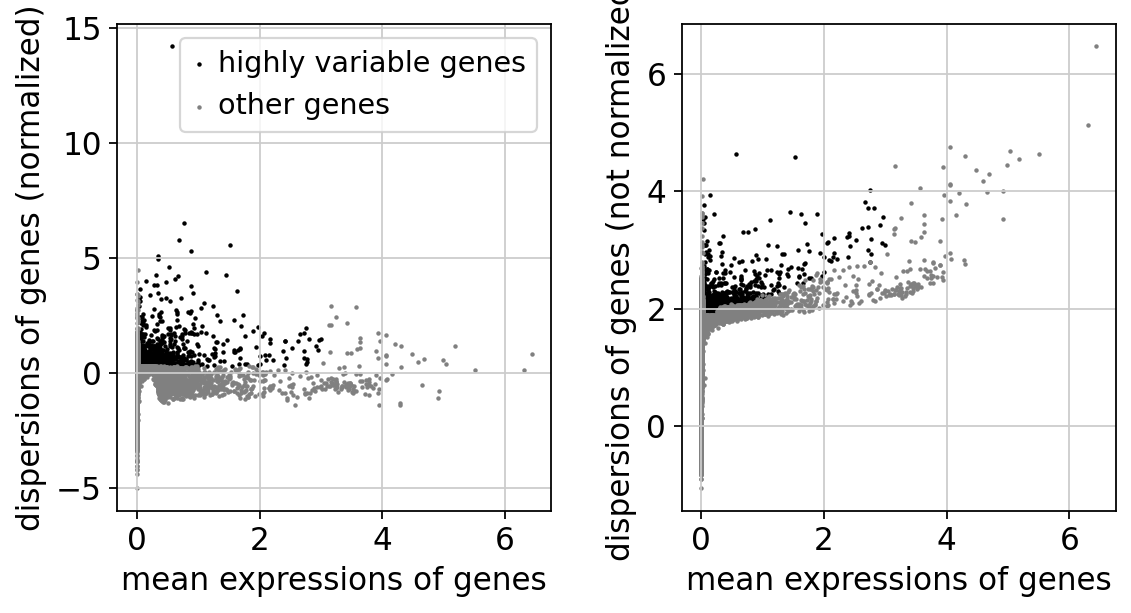

5112
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:18)


2024-07-04 11:23:42,483 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-07-04 11:24:28,766 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-04 11:24:29,231 - harmonypy - INFO - Iteration 1 of 10
2024-07-04 11:25:10,973 - harmonypy - INFO - Iteration 2 of 10
2024-07-04 11:25:55,216 - harmonypy - INFO - Iteration 3 of 10
2024-07-04 11:26:40,037 - harmonypy - INFO - Iteration 4 of 10
2024-07-04 11:27:12,148 - harmonypy - INFO - Iteration 5 of 10
2024-07-04 11:27:40,955 - harmonypy - INFO - Iteration 6 of 10
2024-07-04 11:28:01,905 - harmonypy - INFO - Iteration 7 of 10
2024-07-04 11:28:26,443 - harmonypy - INFO - Iteration 8 of 10
2024-07-04 11:28:47,995 - harmonypy - INFO - Iteration 9 of 10
2024-07-04 11:29:10,764 - harmonypy - INFO - Iteration 10 of 10
2024-07-04 11:29:30,146 - harmonypy - INFO - Stopped before convergence


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:54)


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


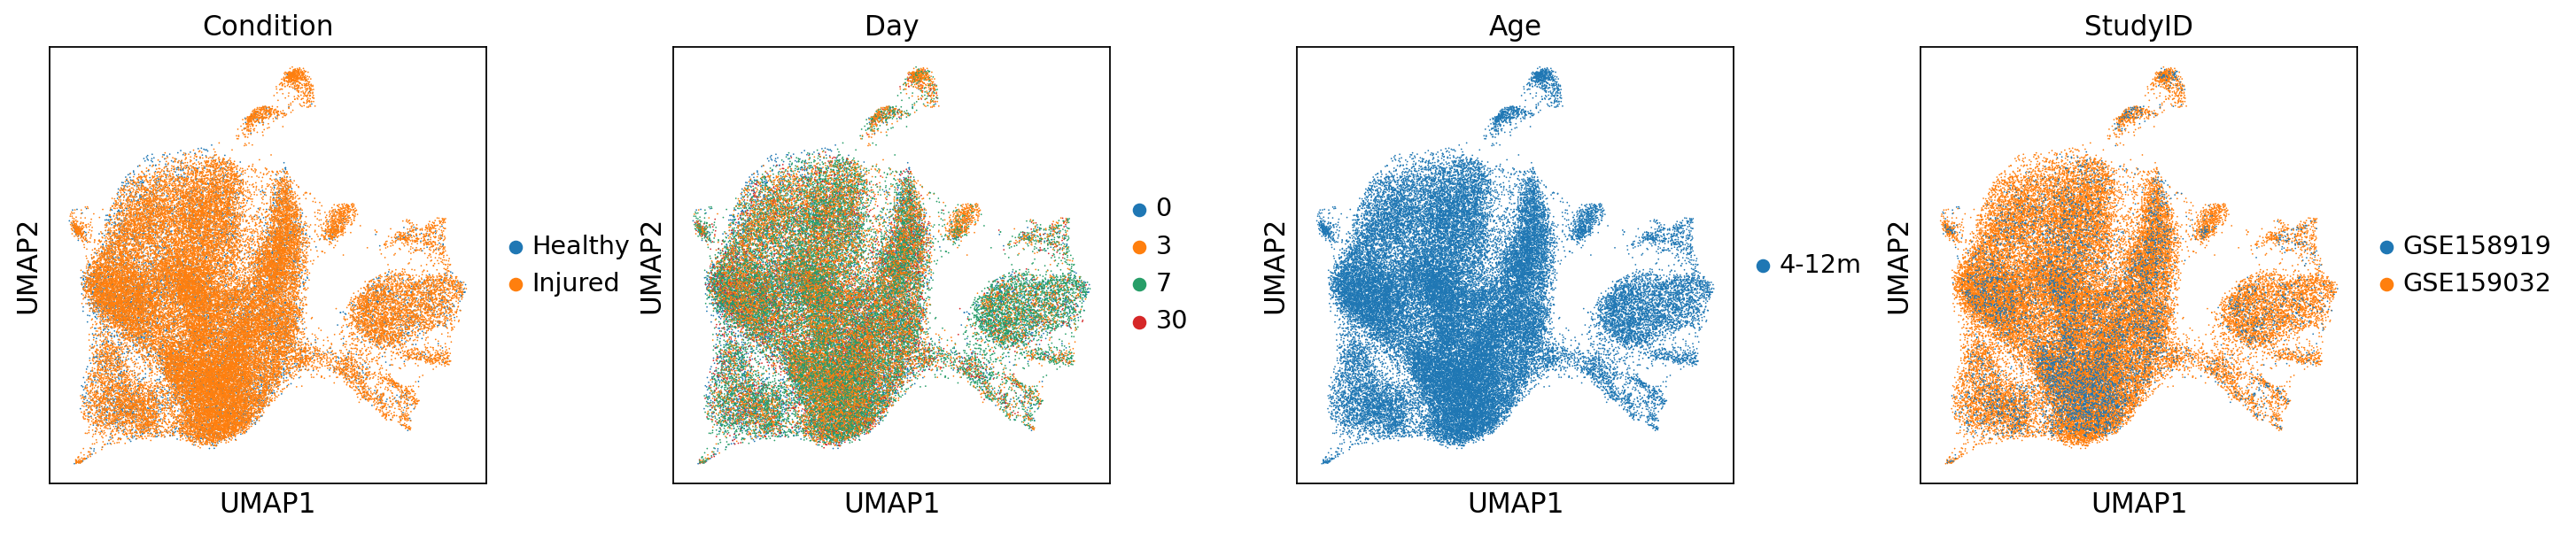

In [10]:
adata = anndata.AnnData(X=adata.raw.X, obs=adata.obs, var=adata.raw.var)
adata.raw = adata
# Cells look ok, filter out non-expressing genes
sc.pp.filter_genes(adata, min_cells=1)
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='StudyID', inplace=True)
sc.pl.highly_variable_genes(adata)
print(np.sum(adata.var.highly_variable))
adata = adata[:, adata.var.highly_variable].copy()
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')
sc.external.pp.harmony_integrate(adata, key='Index', adjusted_basis = 'X_pca_harmony_Index_combined')
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony_Index_combined')
sc.tl.umap(adata)
sc.pl.umap(adata, color= ['Condition', 'Day', 'Age', 'StudyID'], wspace=0.3)

In [11]:
adata.write('./write/Endo_Hu_processed.h5ad')

In [12]:
adata = sc.read('./write/Endo_Hu_processed.h5ad')

In [17]:
sc.tl.leiden(adata, resolution=1, key_added='Leiden_endo')

running Leiden clustering
    finished: found 17 clusters and added
    'Leiden_endo', the cluster labels (adata.obs, categorical) (0:00:12)


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


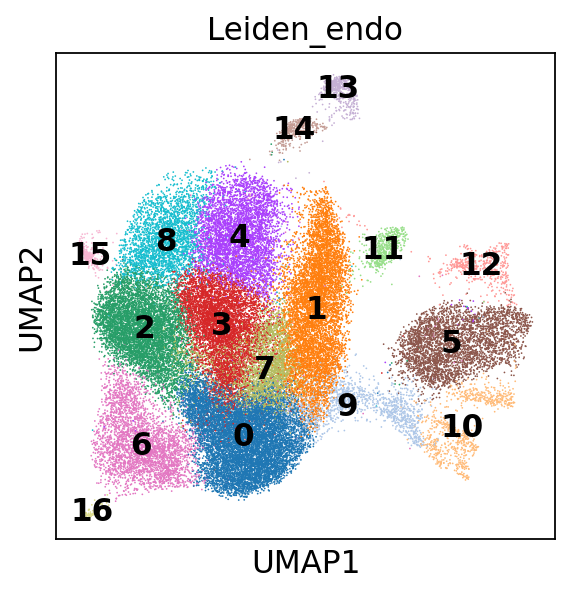

In [30]:
sc.pl.umap(adata, color='Leiden_endo', legend_loc='on data',
          save='_Leiden_sub_endo.pdf')

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


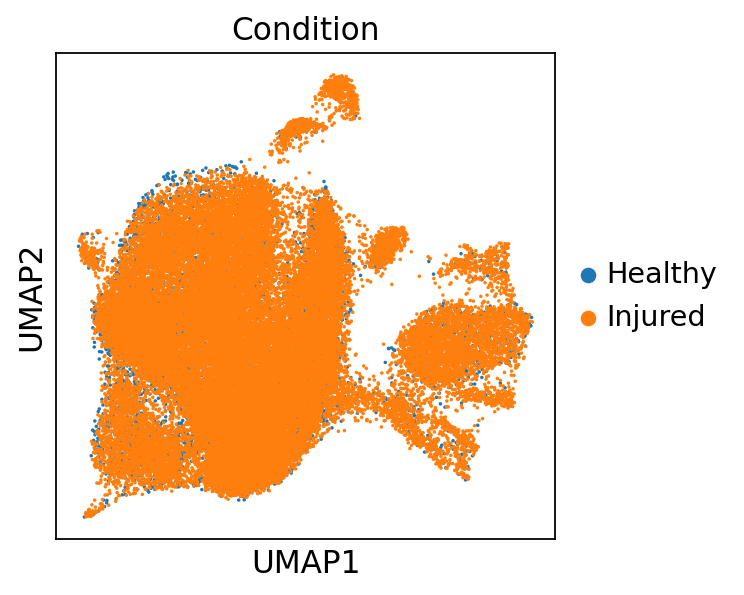

In [34]:
sc.pl.umap(adata, color='Condition',size=10,
          save='_Endo_Condition.pdf')

In [23]:
adata.write('./write/Endo_Hu_processed.h5ad')

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


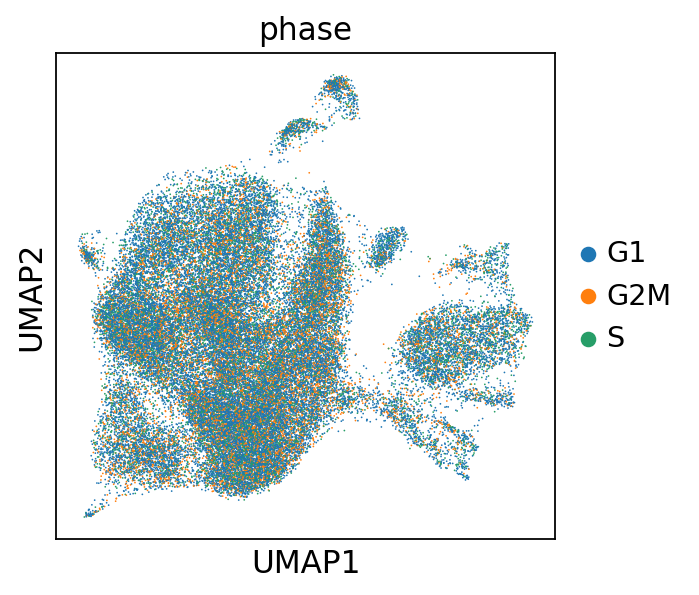

In [21]:
sc.pl.umap(adata, color='phase', color_map=cmap, save='_phase_endo.pdf')

In [25]:
infla_Cardeira = ['ccl35.1','ccl36.1','ccr9a','c1qa','c1qc','cxcr4b','ptprc','mpeg1.1','lcp1','spi1b']

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


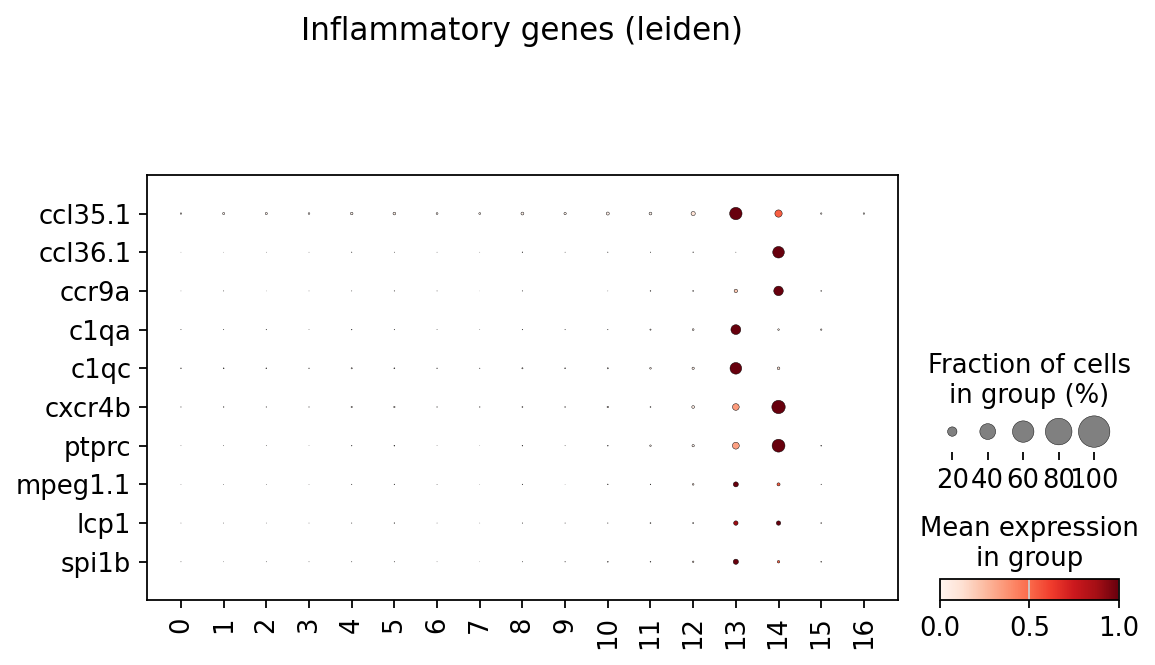

In [26]:
sc.pl.dotplot(adata,groupby='Leiden_endo',var_names=infla_Cardeira,swap_axes=True,dot_max=1,
                    standard_scale='var',title=f'Inflammatory genes (leiden)',
              save=f'Endo_self_cluster_infla_genes.pdf'
                   )

In [27]:
adata.obs['Endo_type'] = ['Inflam.Endo' if np.in1d(x,['13','14']) else 'Other Endo' for x in adata.obs.Leiden_endo]

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


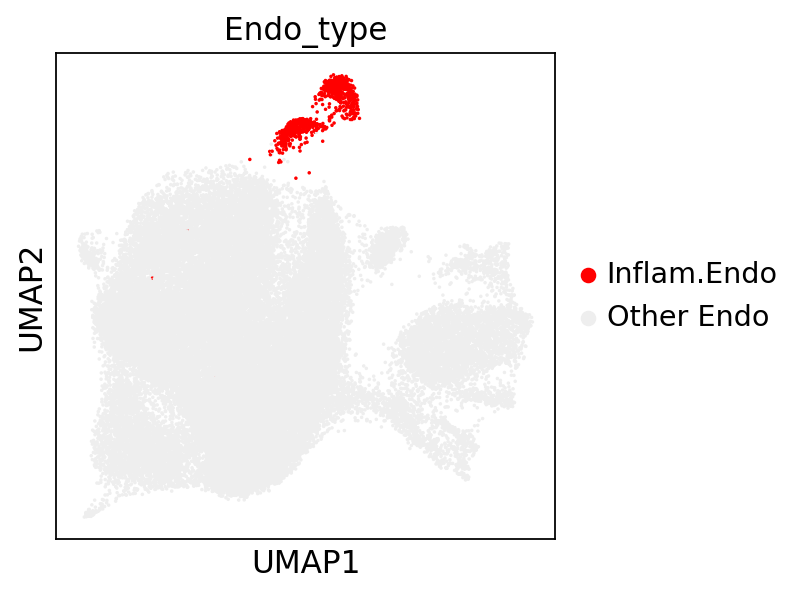

In [47]:
sc.pl.umap(adata, color='Endo_type',size=10,palette=['red','#eeeeee'],
          save='_Endo_type.pdf')

In [37]:
adata.write('./write/Endo_Hu_processed.h5ad')

In [38]:
Infla_Endo = adata[adata.obs.Endo_type=='Inflam.Endo']

### On All filtered

In [ ]:
adata0 = sc.read('./write/All_outer_filtered.h5ad')

In [55]:
adata0.obs['Endo_type'] = adata.obs['Endo_type']

In [56]:
adata0.obs['inflammatory_Endo'] = ['Inflam.Endo' if adata0.obs['Endo_type'][x]=='Inflam.Endo' else 'Other cell' for x in adata0.obs_names] 

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


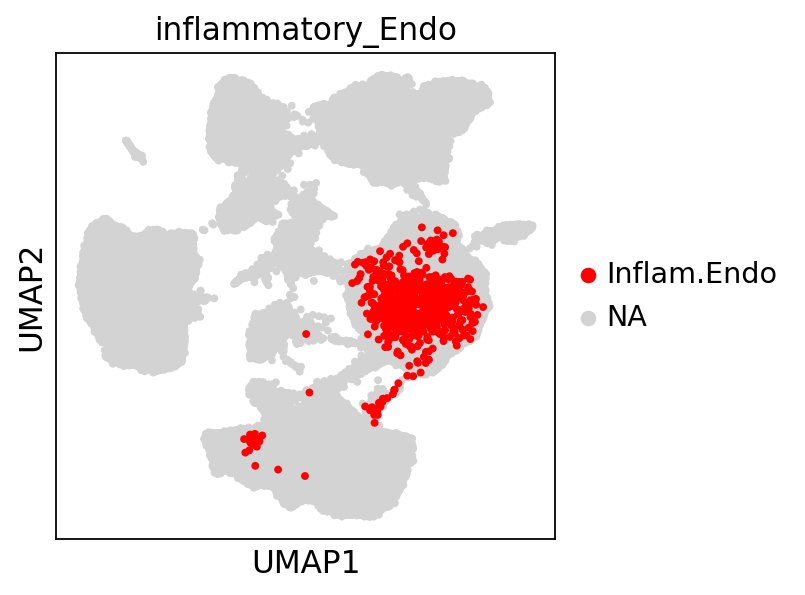

In [57]:
sc.pl.umap(adata0,color='inflammatory_Endo',size=50,groups='Inflam.Endo',
          save='All_filtered_inflam_Endo.pdf')

In [63]:
adata0.obs['CT_new2_colors']

array(['#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#42d4f4',
       '#023fa5', '#7d87b9', '#bec1d4', '#11c638', '#800000', '#aa0000',
       '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#e6194B', '#3cb44b',
       '#4363d8', '#f58231', '#911eb4', '#f032e6', '#ff7f0e'],
      dtype=object)

In [80]:
adata0.obs['CT_Final'] = adata0.obs['CT_new2']

In [81]:
adata0.obs['CT_Final'] = adata0.obs['CT_Final'].cat.rename_categories(
    {'Leiden_v2_Cluster25,0':'EHT-2',
     'Leiden_v2_Cluster25,1':'EHT-4',
     'Leiden_v2_Cluster25,2':'EHT-3',
     'Leiden_v2_Cluster25,3':'EHT-1',
    }) 

In [82]:
adata0.uns['CT_Final_colors'] = adata0.uns['CT_new2_colors']

In [83]:
adata0.obs.CT_Final.cat.categories

Index(['B-cells', 'Bl.ves.EC', 'Cardiomyocytes ', 'Endocardium ',
       'Epicardium ', 'Fibroblasts ', 'EHT-2', 'EHT-4', 'EHT-3', 'EHT-1',
       'Lymphatic cells', 'Macrophage 1', 'Macrophage 2', 'Monocytes',
       'Myelin cells', 'Neuronal cells', 'Neutrophils', 'Perivascular cells',
       'Proliferating cells', 'Smooth muscle cells', 'T-cells', 'Thrombocytes',
       'Valve fibroblasts'],
      dtype='object')

In [85]:
adata0.obs['CT_endov2'] = ['Endocardium (Inflam.)' if (adata0.obs['CT_Final'][x]=='Endocardium ' and adata0.obs['inflammatory_Endo'][x]=='Inflam.Endo') else adata0.obs['CT_Final'][x] for x in adata0.obs_names]

In [89]:
adata0.obs.CT_endov2 = adata0.obs.CT_endov2.astype('category').cat.reorder_categories(['B-cells', 'Bl.ves.EC', 'Cardiomyocytes ', 
                                                       'Endocardium ','Endocardium (Inflam.)',
       'Epicardium ', 'Fibroblasts ', 'EHT-2', 'EHT-4', 'EHT-3', 'EHT-1',
       'Lymphatic cells', 'Macrophage 1', 'Macrophage 2', 'Monocytes',
       'Myelin cells', 'Neuronal cells', 'Neutrophils', 'Perivascular cells',
       'Proliferating cells', 'Smooth muscle cells', 'T-cells', 'Thrombocytes',
       'Valve fibroblasts'])

In [94]:
adata0.uns['CT_endov2_colors'] = ['#bfef45', '#fabed4', '#469990', '#dcbeff', '#dd0000',
                                  '#9A6324', '#42d4f4',
       '#023fa5', '#7d87b9', '#bec1d4', '#11c638', '#800000', '#aa0000',
       '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#e6194B', '#3cb44b',
       '#4363d8', '#f58231', '#911eb4', '#f032e6', '#ff7f0e']

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


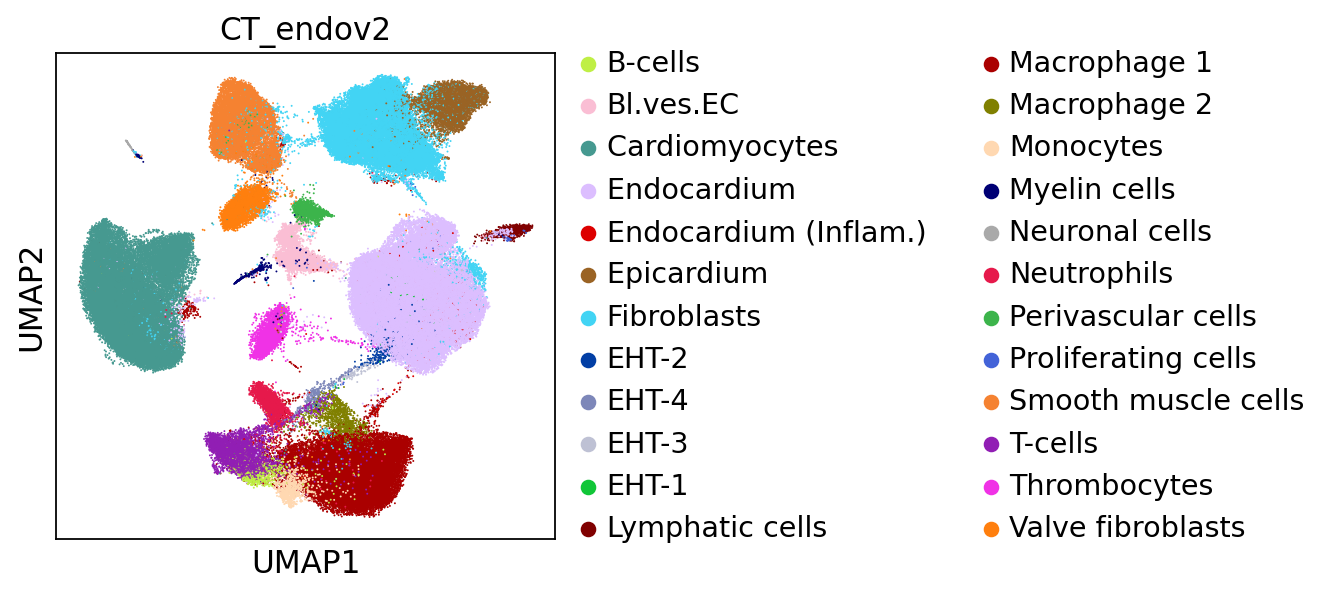

In [95]:
sc.pl.umap(adata0,color='CT_endov2',size=3,
          save='All_filtered_CT_endov2.pdf')

In [96]:
adata0.write('./write/All_outer_filtered.h5ad')

In [97]:
del(adata0)

### On cus_data

In [40]:
adata0 = sc.read('./write/cus_data_Endo_c25_dbpos_wt.h5ad')

In [41]:
adata0.obs['Endo_type'] = adata.obs['Endo_type']

In [42]:
adata0.obs['inflammatory_Endo'] = ['Inflam.Endo' if adata0.obs['Endo_type'][x]=='Inflam.Endo' else 'Other cell' for x in adata0.obs_names] 

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


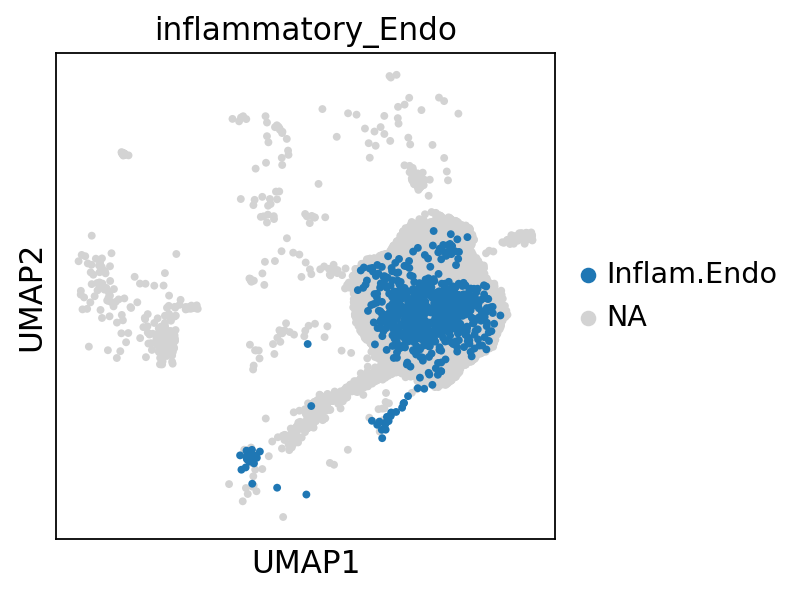

In [46]:
sc.pl.umap(adata0,color='inflammatory_Endo',size=50,groups='Inflam.Endo',
          save='cus_data_inflam_Endo.pdf')